# Descriptive Analysis of Sentiment Analysis for Mental Health Dataset

## Introduction

This notebook explores the **Sentiment Analysis for Mental Health** dataset from Kaggle, which contains user-generated textual statements labeled with mental health conditions such as depression, anxiety, stress, and others. The goal is to understand the dataset's structure, class distributions, and key characteristics before building predictive models.

**Descriptive analysis** involves summarizing and visualizing essential features of the dataset, including field types, missing values, label/class distributions, text properties, and example entries. This step provides valuable context for data quality assessment and guides further analysis and modeling decisions.

## 1. Importing Libraries

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Loading the Dataset

In [77]:
df = pd.read_csv('Sentiment Analysis for Mental Health Dataset.csv')

## 3. Basic Dataset Overview

In [79]:
print("Shape:", df.shape)
print("Columns:", df.columns)
df.head()

Shape: (53043, 3)
Columns: Index(['Unnamed: 0', 'statement', 'status'], dtype='object')


,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [80]:
df.describe(include="all")

,Unnamed: 0,statement,status
count,53043.000000,52681,53043
unique,NaN,51073,7
top,NaN,what do you mean?,Normal
freq,NaN,22,16351
mean,26521.000000,NaN,NaN
std,15312.339501,NaN,NaN
min,0.000000,NaN,NaN
25%,13260.500000,NaN,NaN
50%,26521.000000,NaN,NaN
75%,39781.500000,NaN,NaN


## 4. Checking for Missing Values

In [82]:
missing = df.isnull().sum()
print("Missing Values:\n",end="")
print(missing)

Missing Values:
Unnamed: 0      0
statement     362
status          0
dtype: int64


## 5. Field Types and Unique Values

In [84]:
for col in df.columns:
    print(f"{col} - Unique Values: {df[col].nunique()}")

Unnamed: 0 - Unique Values: 53043
statement - Unique Values: 51073
status - Unique Values: 7


## 6. Label/Class Distribution

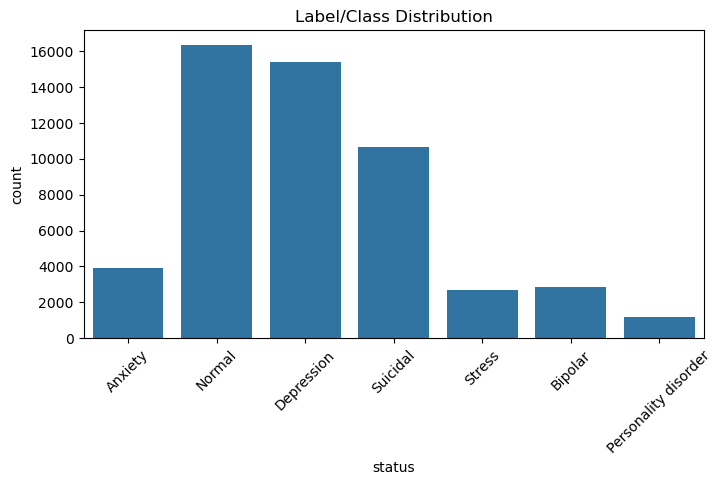

status
Normal                  16351
Depression              15404
Suicidal                10653
Anxiety                  3888
Bipolar                  2877
Stress                   2669
Personality disorder     1201
Name: count, dtype: int64


In [86]:
plt.figure(figsize=(8,4))
sns.countplot(x='status', data=df)
plt.title("Label/Class Distribution")
plt.xticks(rotation=45)
plt.show()
print(df['status'].value_counts())

## 7. Analysis of Text Length

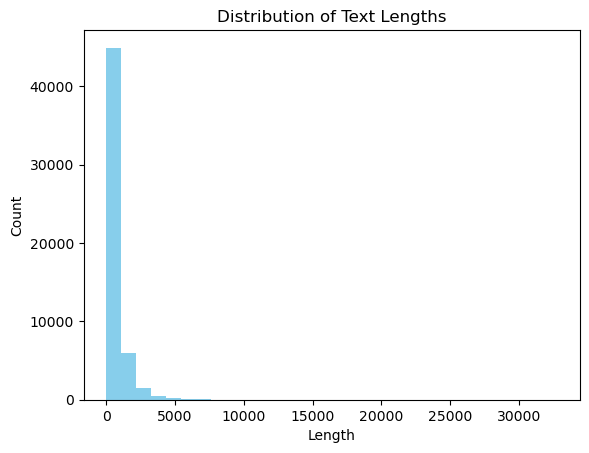

In [88]:
df['text_length'] = df['statement'].astype(str).apply(len)
plt.hist(df['text_length'], bins=30, color='skyblue')
plt.title("Distribution of Text Lengths")
plt.xlabel("Length")
plt.ylabel("Count")
plt.show()

In [89]:
print("Mean length:", df['text_length'].mean())
print("Max length:", df['text_length'].max())

Mean length: 574.7848160926042
Max length: 32759


## 8. Example Entries by Class

In [91]:
for label in df['status'].unique():
    print(f"\nExample for {label}:")
    print(df[df['status'] == label]['statement'].iloc[0])


Example for Anxiety:
oh my gosh

Example for Normal:
Gr gr dreaming of ex crush to be my game, God

Example for Depression:
I recently went through a breakup and she said she still wants to be friends so I said I can try doing that but when she talks to me about things it always hurts. I just want to lose feelings so all this pain can stop it hurts so much and I cannot even cry about it. I do not want to hurt her because she said she does not want to never speak to me again but I do not know what to do here. When we were together she always hurt me so I do not know why I still love her. I wish we never met it would be much less painful How do I lose feelings?

Example for Suicidal:
I am so exhausted of this. Just when I think I can finally rest, just when I think maybe things are starting to settle, another hurdle comes flying at me. This month alone we found out my mum could be dying, my girlfriend left me, my parents revealed that they wanted a divorce, my grandad was hospitalised a

## 10. Exporting Summary Statistics

In [93]:
summary = df.describe(include='all')
summary.to_csv('dataset_summary.csv')
print(summary)

          Unnamed: 0          statement  status   text_length
count   53043.000000              52681   53043  53043.000000
unique           NaN              51073       7           NaN
top              NaN  what do you mean?  Normal           NaN
freq             NaN                 22   16351           NaN
mean    26521.000000                NaN     NaN    574.784816
std     15312.339501                NaN     NaN    844.707198
min         0.000000                NaN     NaN      2.000000
25%     13260.500000                NaN     NaN     77.000000
50%     26521.000000                NaN     NaN    313.000000
75%     39781.500000                NaN     NaN    748.000000
max     53042.000000                NaN     NaN  32759.000000
